In [30]:
!pip install seaborn --quiet

import os
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Load Data
df = pd.read_csv('G:/My Drive/Colab Notebooks/price_catcher/data/selangor_2022/input_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()


In [38]:
df = df[df["premise"].str.contains("PASAR SELAYANG BARU", na=False)]
df.head()

,date,premise,premise_type,district,state,item,item_category,price
1388,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,AYAM BERSIH - STANDARD,AYAM,9.1
1389,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,DAGING,36.0
1390,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,BETIK BIASA,BUAH-BUAHAN,5.5
1391,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,PISANG BERANGAN,BUAH-BUAHAN,6.0
1392,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,PISANG EMAS,BUAH-BUAHAN,6.0


In [39]:
# Interested only with Category: DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL (KECUALI BATANG PINANG - TENDERLOIN)
seafood = df[df["item_category"]=="BAHAN LAUT"]
seafood.head()

,date,premise,premise_type,district,state,item,item_category,price
1396,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,IKAN BAWAL HITAM (ANTARA 2 HINGGA 5 EKOR SEKIL...,BAHAN LAUT,26.0
1397,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,IKAN CENCARU (ANTARA 4 HINGGA 6 EKOR SEKILOGRAM),BAHAN LAUT,14.0
1398,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,IKAN GELAMA (ANTARA 5 HINGGA 10 EKOR SEKILOGRAM),BAHAN LAUT,15.0
1399,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,IKAN JENAHAK (b\t% 1 KILOGRAM SEEKOR),BAHAN LAUT,36.0
1400,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,KEPALA IKAN JENAHAK,BAHAN LAUT,30.0


In [42]:
# Interested only with Category: DAGING LEMBU TEMPATAN (BAHAGIAN 2 DAGING PEJAL (KECUALI BATANG PINANG - TENDERLOIN)
sotong = seafood[seafood["item"].str.contains("SOTONG", na=False)]
sotong.head()

,date,premise,premise_type,district,state,item,item_category,price
1465,2022-01-01,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,36.0
21908,2022-01-02,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,36.0
29886,2022-01-03,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,36.0
46147,2022-01-04,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,36.0
53224,2022-01-05,PASAR SELAYANG BARU,Pasar Basah,Gombak,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,36.0


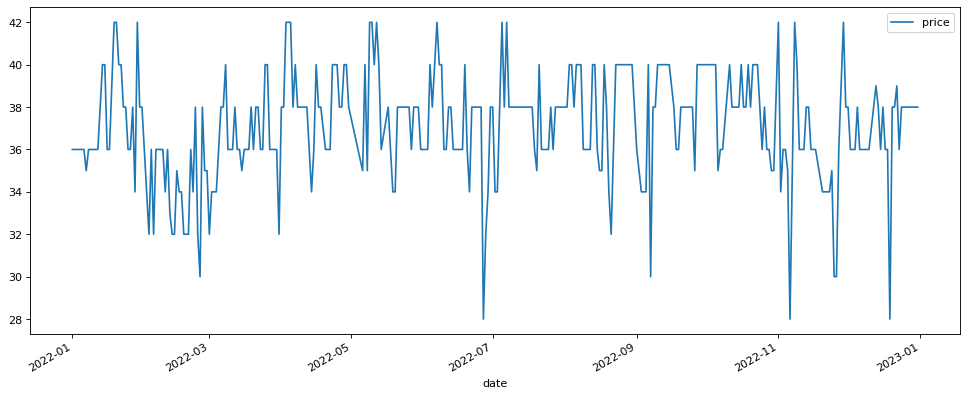

In [44]:
sotong.plot('date','price')
plt.show()

In [45]:
!pip install pmdarima --quiet
!pip install statsmodels --quiet

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

from pandas import datetime
from pandas import DataFrame
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':80})
sotong.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,premise,premise_type,district,state,item,item_category,price
1976,2022-01-01 00:00:00,GIANT SEKSYEN 7 SHAH ALAM,Pasar Raya / Supermarket,Petaling,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,24.950000
2054,2022-01-01 00:00:00,GIANT SEKSYEN 7 SHAH ALAM,Pasar Raya / Supermarket,Petaling,Selangor,SOTONG KERING (SAIZ SERDAHANA),HASIL LAUT KERING,33.500000
22116,2022-01-02 00:00:00,GIANT SEKSYEN 7 SHAH ALAM,Pasar Raya / Supermarket,Petaling,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,24.880000
22148,2022-01-02 00:00:00,GIANT SEKSYEN 7 SHAH ALAM,Pasar Raya / Supermarket,Petaling,Selangor,SOTONG KERING (SAIZ SERDAHANA),HASIL LAUT KERING,33.500000
30325,2022-01-03 00:00:00,GIANT SEKSYEN 7 SHAH ALAM,Pasar Raya / Supermarket,Petaling,Selangor,SOTONG (≥ 6 EKOR SEKILOGRAM),BAHAN LAUT,34.990000


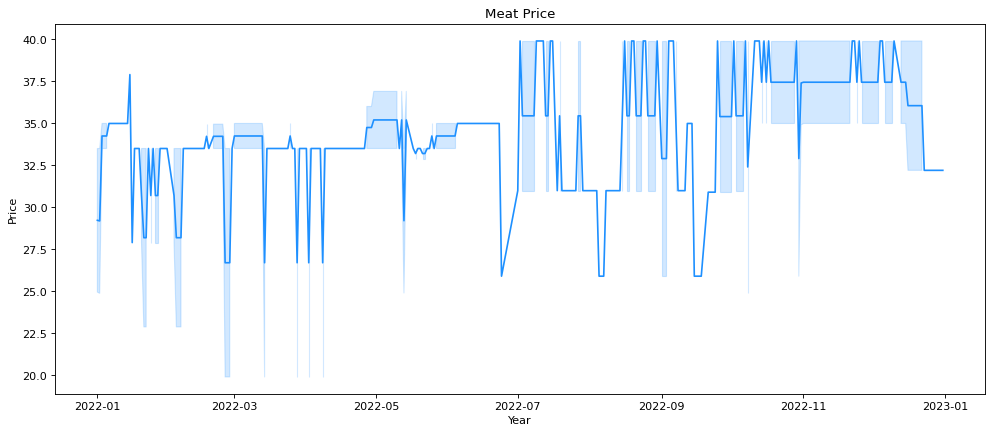

In [46]:
# To compelte the data, as naive method, we will use ffill
sns.lineplot(x=sotong['date'], y=sotong['price'].fillna(method='ffill'), color='dodgerblue')

plt.title("sotong Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [47]:
sotong = sotong.sort_values(by='date')

# Check time intervals
sotong['delta'] = sotong['date'] - sotong['date'].shift(1)

sotong[['date', 'delta']].head()

,date,delta
1976,2022-01-01,NaT
2054,2022-01-01,0 days
22116,2022-01-02,1 days
22148,2022-01-02,0 days
30325,2022-01-03,1 days


<Axes: xlabel='date', ylabel='price'>

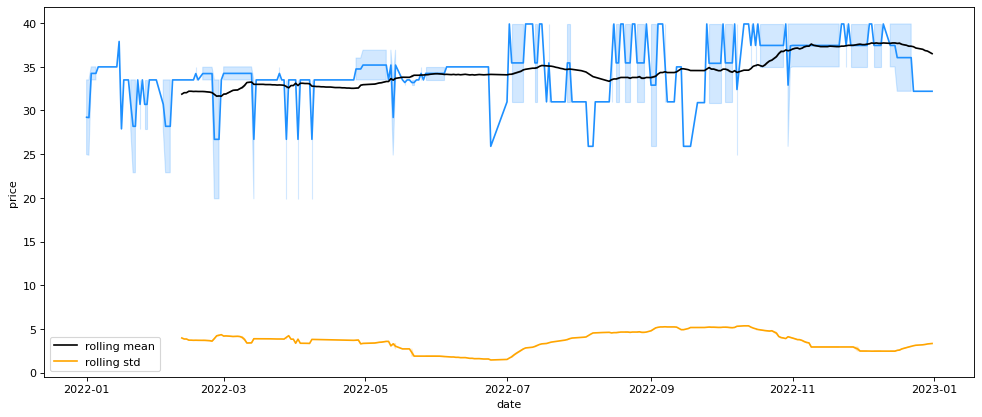

In [48]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52

sns.lineplot(x=sotong['date'], y=sotong['price'], color='dodgerblue')
sns.lineplot(x=sotong['date'], y=sotong['price'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=sotong['date'], y=sotong['price'].rolling(rolling_window).std(), color='orange', label='rolling std')

## **Stationary Test**

In [49]:
from statsmodels.tsa.stattools import adfuller
series = sotong['price'].values
result = adfuller(series)
significance_level = 0.05
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']


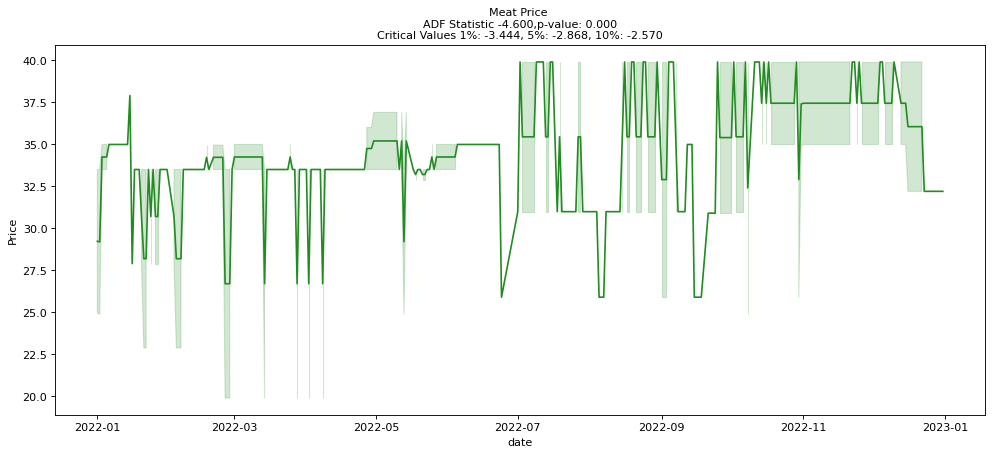

In [50]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=sotong.date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'sotong Price \nADF Statistic {adf_stat:0.3f},p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adfuller_results(sotong['price'].values, 'Price', ax)


<Axes: xlabel='price_log', ylabel='Density'>

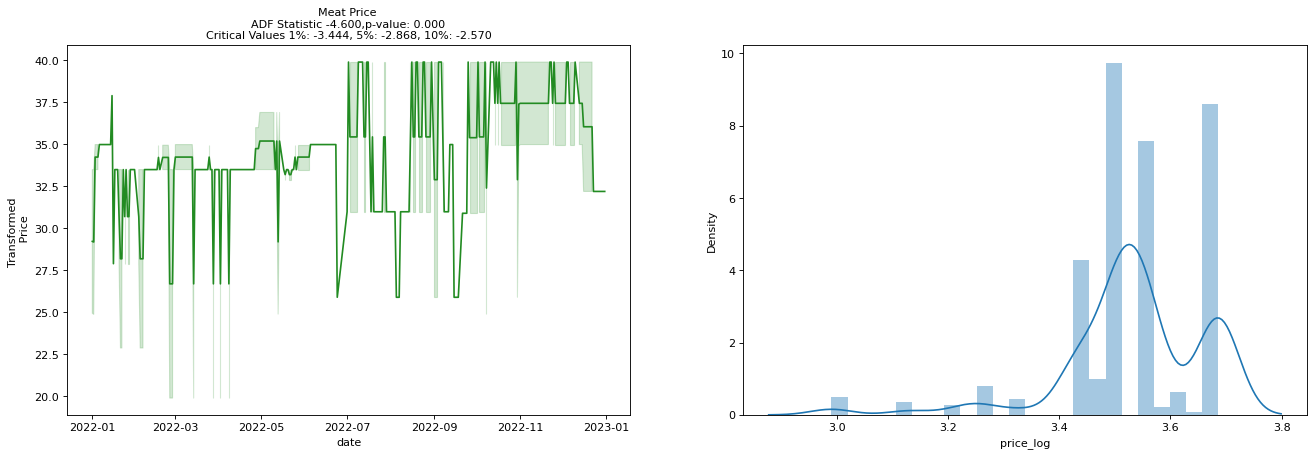

In [51]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sotong['price_log'] = np.log(abs(sotong['price']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(sotong['price'], 'Transformed \n Price', ax[0])

sns.distplot(sotong['price_log'], ax=ax[1])

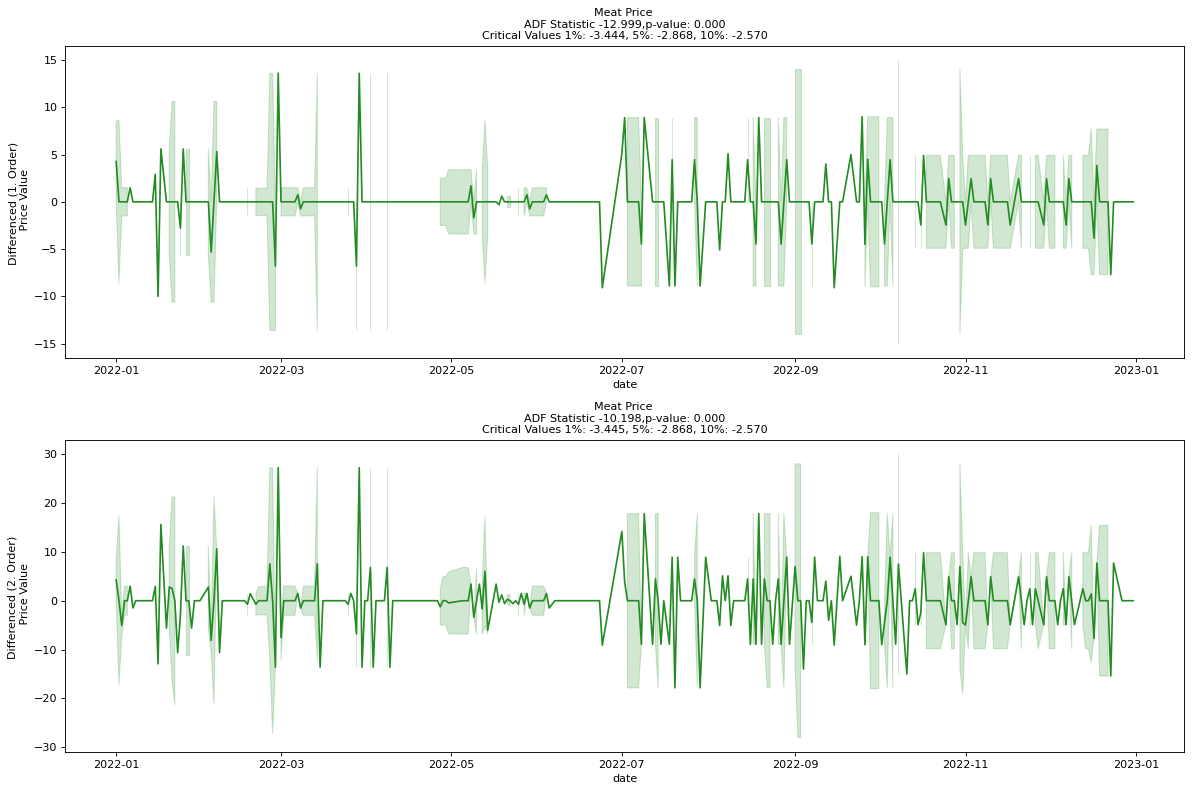

In [52]:
# First Order Differencing
ts_diff = np.diff(sotong['price'])
sotong['price_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(sotong['price_diff_1'])
sotong['price_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

visualize_adfuller_results(sotong['price_diff_1'], 'Differenced (1. Order) \n Price Value', ax[0])
visualize_adfuller_results(sotong['price_diff_2'], 'Differenced (2. Order) \n Price Value', ax[1])
plt.tight_layout()
plt.show()

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['price']

for column in core_columns:
    decomp = seasonal_decompose(sotong[column], period=52, model='additive', extrapolate_trend='freq')
    sotong[f"{column}_trend"] = decomp.trend
    sotong[f"{column}_seasonal"] = decomp.seasonal

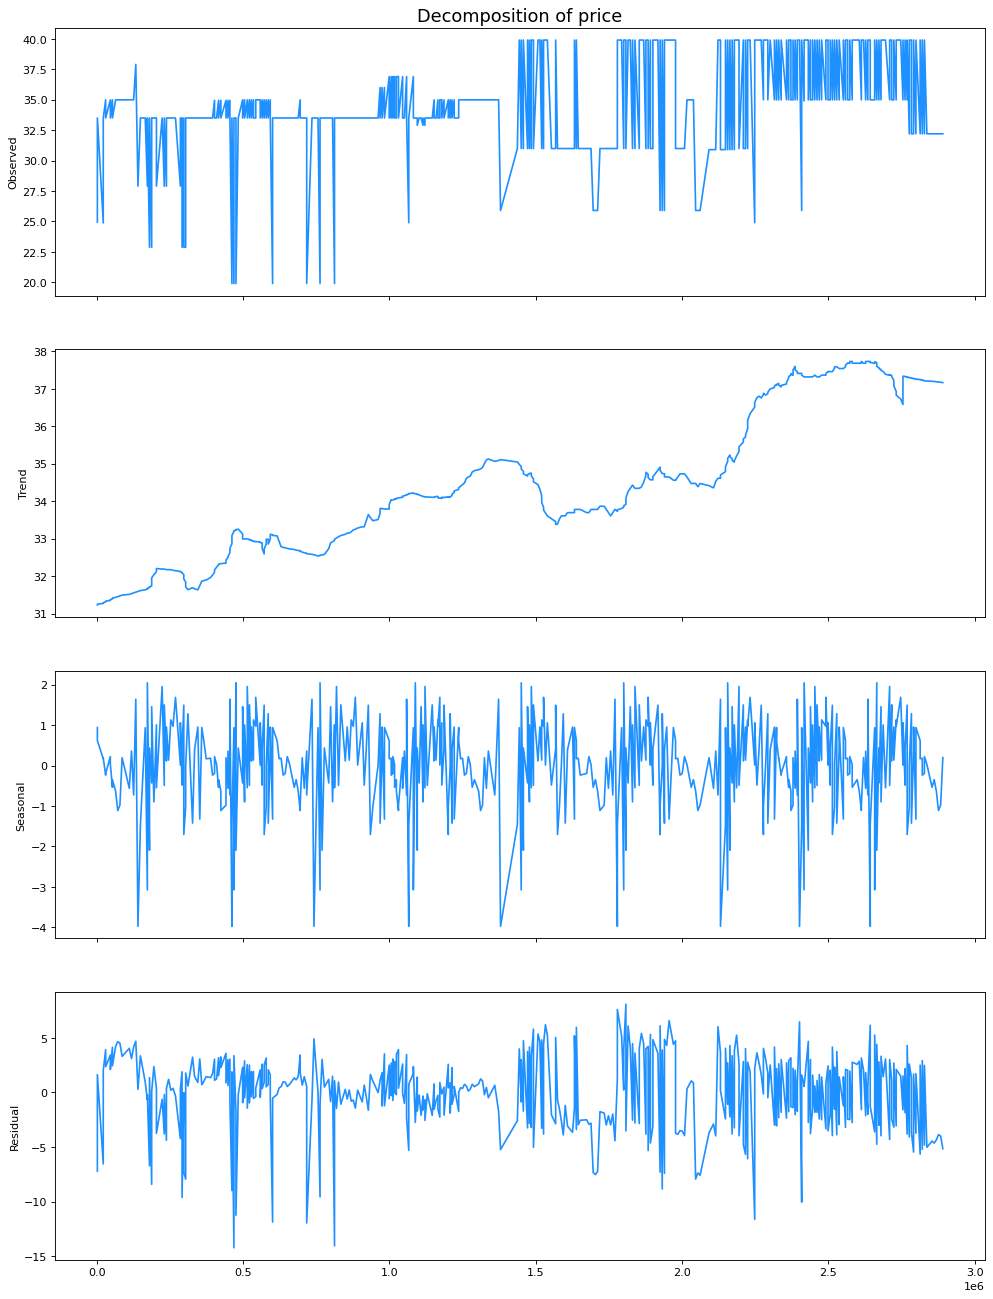

In [54]:
core_columns =  ['price']

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(15,20))
res = seasonal_decompose(sotong[column], period=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=10)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=10)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=10)

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=10)

plt.show()

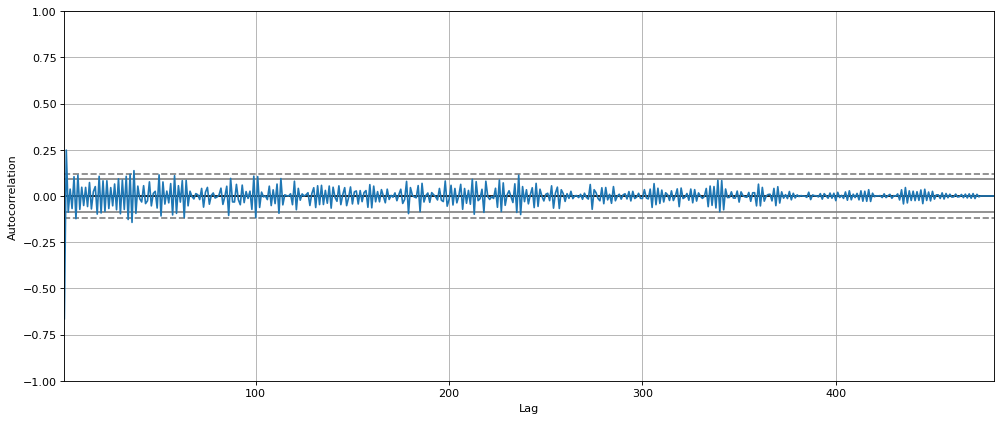

In [55]:
autocorrelation_plot(sotong['price_diff_1'])
plt.show()

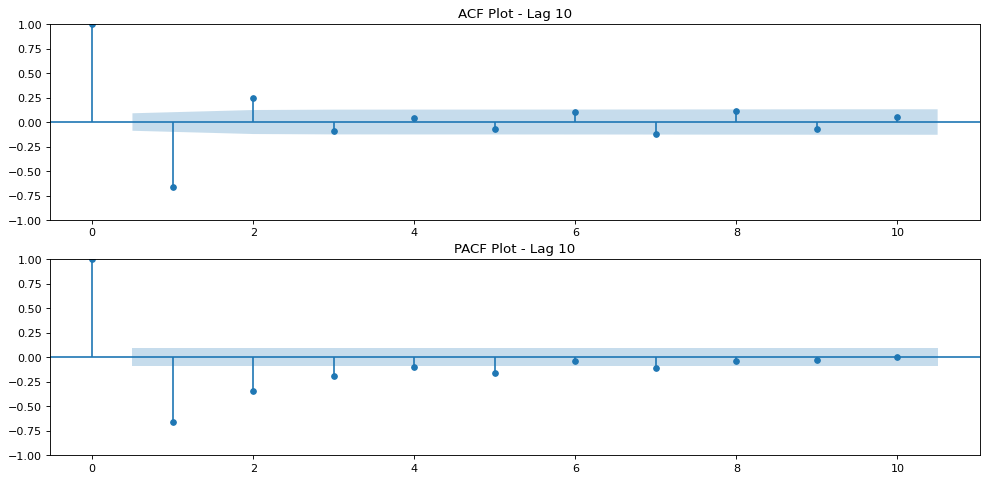

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

plot_acf(sotong['price_diff_1'], lags=10, ax=ax[0], title='ACF Plot - Lag 10')
plot_pacf(sotong['price_diff_1'], lags=10, ax=ax[1], title='PACF Plot - Lag 10')

plt.show()

In [57]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to sotong dataset
stepwise_fit = auto_arima(sotong['price'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2898.497, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2800.947, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2896.520, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2899.791, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2772.919, Time=1.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2771.610, Time=1.31 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2799.661, Time=0.33 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2773.189, Time=1.19 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2756.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  482
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1350.174
Date:                             Sun, 09 Jul 2023   AIC                           2712.347
Time:                                     14:00:08   BIC                           2737.263
Sample:                                          0   HQIC                          2722.150
                                             - 482                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3533      0.093      3.819      0.000       0.172       0.535
ar.L2          0.3443      0.042      8.171      0.000       0.262       0.427
ma.L1         -0.4334      0.093     -4.673      0.000      -0.615      -0.252
ar.S.L12      -0.6125      0.040    -15.149      0.000      -0.692      -0.533
ar.S.L24      -0.2807      0.038     -7.366      0.000      -0.355      -0.206
sigma2        18.1056      1.013     17.870      0.000      16.120      20.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                36.18
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.49
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# Split data into train / test sets
train = sotong.iloc[:len(sotong)-12]
test = sotong.iloc[len(sotong)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(2, 0, 1)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['price'],
				order = (2, 0, 1),
				seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               price   No. Observations:                  470
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1317.996
Date:                             Sun, 09 Jul 2023   AIC                           2647.992
Time:                                     14:00:51   BIC                           2672.754
Sample:                                          0   HQIC                          2657.745
                                             - 470                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3504      0.097      3.625      0.000       0.161       0.540
ar.L2          0.3348      0.043      7.863      0.000       0.251       0.418
ma.L1         -0.4331      0.097     -4.456      0.000      -0.624      -0.243
ar.S.L12      -0.6157      0.041    -15.085      0.000      -0.696      -0.536
ar.S.L24      -0.2806      0.039     -7.273      0.000      -0.356      -0.205
sigma2        18.2813      1.036     17.654      0.000      16.252      20.311
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                37.91
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.51
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

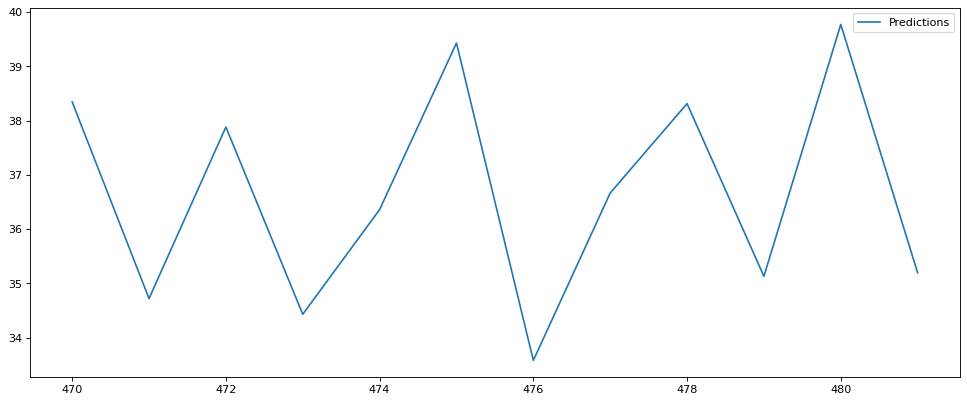

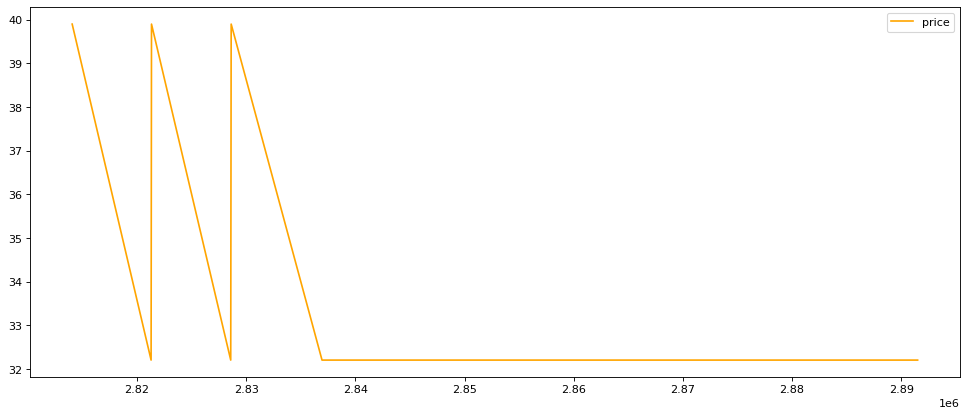

In [71]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
plt.show()
test['price'].plot(legend = True, color='orange')
plt.show()